In [22]:
import os

from matplotlib import pyplot as plt, cm
import numpy as np
import neptune.new as neptune
import pytorch_lightning as pl
import torch

from src.wakegan import WakeGAN

### Download pretrained model from neptune

In [2]:
model_version = neptune.init_model_version(
    with_id="WAK-MOD-10",
    project="idatha/wakegan",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiIyNWQ5YjJjZi05OTE1LTRhNWEtODdlZC00MWRlMzMzNGMwMzYifQ==",
)
model_version["model/ckpt"].download(destination="models")

https://app.neptune.ai/idatha/wakegan/m/WAK-MOD/v/WAK-MOD-10
Remember to stop your model_version once you’ve finished logging your metadata (https://docs.neptune.ai/api/model_version#stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.


### Load model

In [3]:
wakegan = WakeGAN.load_from_checkpoint('models/wakegan.ckpt')
wakegan.eval()

WakeGAN(
  (generator): Generator(
    (linear): Linear(in_features=64, out_features=4096, bias=True)
    (gen): Sequential(
      (0): ConvTranspose2d(64, 1024, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (1): LeakyReLU(negative_slope=0.01)
      (2): ConvTranspose2d(1024, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (3): LeakyReLU(negative_slope=0.01)
      (4): ConvTranspose2d(512, 1, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (5): Tanh()
    )
  )
  (discriminator): Discriminator(
    (linear): Linear(in_features=64, out_features=4096, bias=True)
    (disc): Sequential(
      (0): Conv2d(2, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (1): LeakyReLU(negative_slope=0.2)
      (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (3): LeakyReLU(negative_slope=0.2)
      (4): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (5): LeakyReLU(negative_slope=0.2)
      (6): Flatten(

### evaluate model on random input

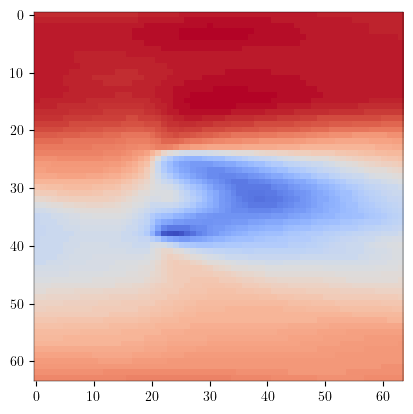

In [38]:
# load .png image
img = plt.imread('data/preprocessed/tracked/test/ux/n576n24_ux.png')
plt.imshow(img[:, :, 0], cmap=cm.coolwarm)

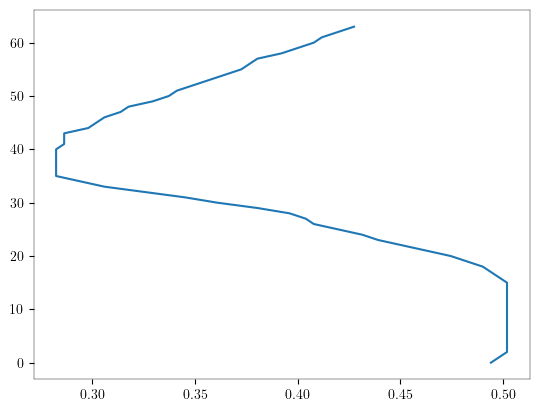

In [30]:
inflow = img[:, 0, 0]
plt.plot(inflow, np.arange(0, 64))

In [35]:
# random torch of shape 1, 1, 64 in range [-1, 1]
# rnd_inflow = torch.rand(1, 1, 64) * 2 - 1

synth = wakegan(torch.from_numpy(inflow).unsqueeze(dim=0))

### display synthetic flow

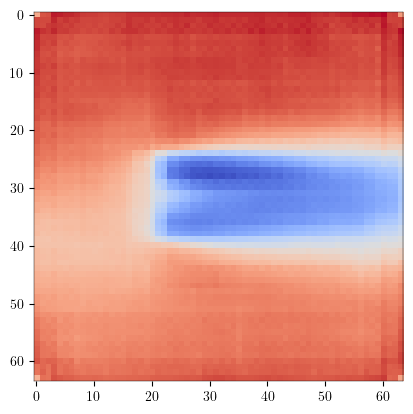

In [39]:
plt.imshow(synth.squeeze().detach().numpy(), cmap=cm.coolwarm)

In [6]:
import neptune.new as neptune
project = neptune.init_project(name="idatha/wakegan", api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiIyNWQ5YjJjZi05OTE1LTRhNWEtODdlZC00MWRlMzMzNGMwMzYifQ==")

/tmp/ipykernel_739030/419074593.py:2: NeptuneDeprecationWarning: Parameter `name` is deprecated, use `project` instead. We'll end support of it in `neptune-client==1.0.0`.
  project = neptune.init_project(name="idatha/wakegan", api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiIyNWQ5YjJjZi05OTE1LTRhNWEtODdlZC00MWRlMzMzNGMwMzYifQ==")


https://app.neptune.ai/idatha/wakegan/
Remember to stop your project once you’ve finished logging your metadata (https://docs.neptune.ai/api/project#stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.


In [7]:
project["general/brief"] = 'https://github.com/maxibove13/wakeGAN'
# project["general/data_analysis"].upload("data_analysis.ipynb")
project["dataset/v0.1"].track_files("data/preprocessed/tracked/train/ux")
# project["dataset/latest"] = project["dataset/v0.1"].fetch(